# Trust Bank Fraud Detection


**Author**: Tai Nyirenda

**Overview** : This Python notebook aims to report, analyse, visualise and build a model based on Trust Bank's dataset on fraudulent and non-fraudulent transactions. The efficiency of fraud detection depends on the dataset quality, analysis performed, data pre-processing, feature engineering, machine learning algorithms and interpretation of results. 


### Importing library packages for use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#### Data import

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv("Trust_Bankdata.csv")
data.head()

C:\Users\taies\AppData\Local\Temp\ipykernel_15468\1418835801.py:1: DtypeWarning: Columns (18,19,20,21,27,28,29,30,31,44,48,56,102,103,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Trust_Bankdata.csv")


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,100002.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,100003.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

# Exploratory Data Analysis - EDA

#### Displaying total rows and columns in dataset

In [4]:
data.shape

(590540, 138)

We have 138 Columns and 590540 rows in our dataset,

#### Data columns statistical summary

In [5]:
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,

Here we can see the mean values of each column to gain insight into the column distributions. This is only shown for numerical values.

#### Checkin for columns with missing value

In [6]:
data.isnull().sum()

TransactionID                        0
isFraud                              0
TransactionDT                        0
TransactionAmt                       0
ProductCD                            0
card1                                0
card2                             8933
card3                             1565
card4                             1577
card5                             4259
card6                             1571
addr1                            65706
addr2                            65706
dist1                           352271
dist2                           552913
P_emaildomain                    94456
R_emaildomain                   453249
SK_ID_CURR                      283029
NAME_CONTRACT_TYPE              283029
CODE_GENDER                     283029
FLAG_OWN_CAR                    283029
FLAG_OWN_REALTY                 283029
CNT_CHILDREN                    283029
AMT_INCOME_TOTAL                283029
AMT_CREDIT                      283029
AMT_ANNUITY              

We can see that the data set has high missingness in a number of columns. 

Dataset Data Types:

In [74]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 119 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    TransactionID                                      int64  
 1    isFraud                                            int64  
 2    TransactionDT                                      int64  
 3    TransactionAmt                                     float64
 4    card1                                              int64  
 5    card2                                              float64
 6    card3                                              float64
 7    card5                                              float64
 8    addr1                                              float64
 9    addr2                                              float64
 10   dist1                                              float64
 11   dist2                                

With the information provided about the dataset, we are dealing with categorical and numerical data.

# Data Visualisation

#### Displaying fraud class distribution

In [7]:
data['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

C:\Users\taies\AppData\Local\Temp\ipykernel_15468\3351661323.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['isFraud'], sort = True)


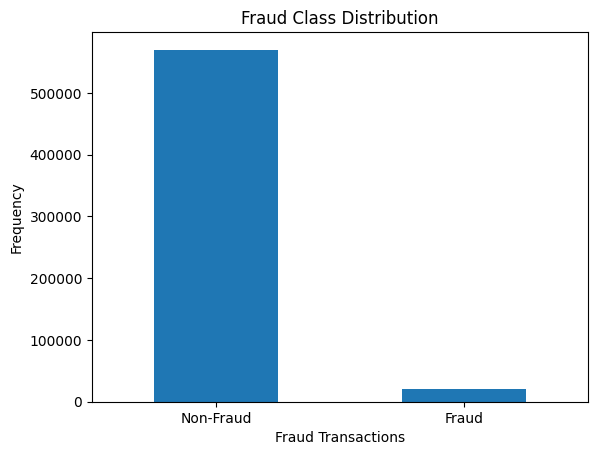

In [8]:
LABELS = ["Non-Fraud", "Fraud"]

count_classes = pd.value_counts(data['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Fraud Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Fraud Transactions")
plt.ylabel("Frequency");

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


colors = ['#004B87', 'LightBlue']
labels = ['Non-Fraud', 'Fraud']
values = data['isFraud'].value_counts() / data['isFraud'].shape[0]
total_normal = data[data['isFraud'] == False].shape[0]
total_fraudulent = data[data['isFraud'] == True].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Fraud Transactions</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

The Trust Bank dataset displays a significant class imbalance, indicating a discrepancy in the distribution of fraudulent and non-fraudulent transactions.
This needs to be addressed so a model doesn't over-fit and assume there are more non-fraudalant transactions but rather detect the patterns for the categories of classification. This could be handled using a sampling technique such as SMOTE which will oversamples the underrepresented class, using data from it's column to produce synthetic values whilst preserving data.

#### Determing the number of fraud and valid transactions in the dataset.

In [10]:
data = pd.read_csv("Trust_Bankdata.csv")

fraud = data[data['isFraud']==1]
normal = data[data['isFraud']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

C:\Users\taies\AppData\Local\Temp\ipykernel_15468\1510898913.py:1: DtypeWarning:

Columns (18,19,20,21,27,28,29,30,31,44,48,56,102,103,105,106) have mixed types. Specify dtype option on import or set low_memory=False.



Shape of Fraudulant transactions: (20663, 138)
Shape of Non-Fraudulant transactions: (569877, 138)


#### Investigating Feature Distributions of Numerical Columns that may be of importance:

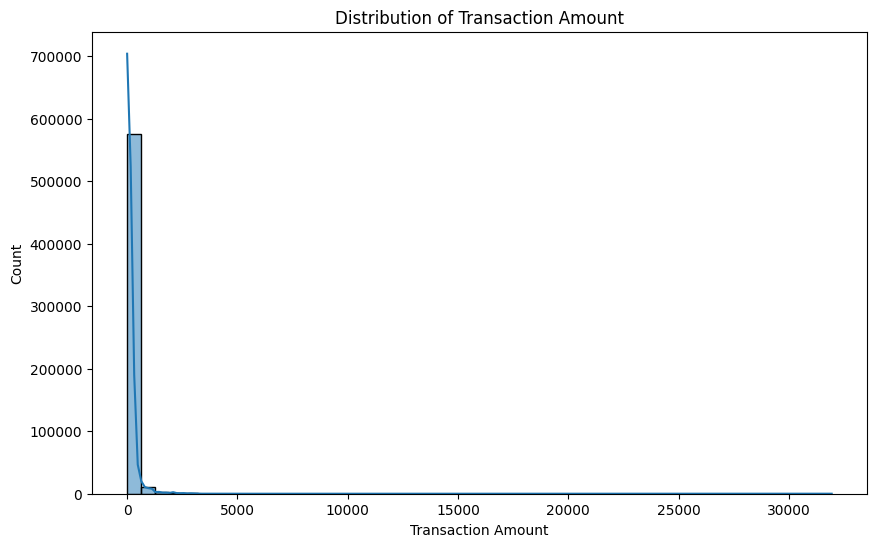

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmt'], kde=True, bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()


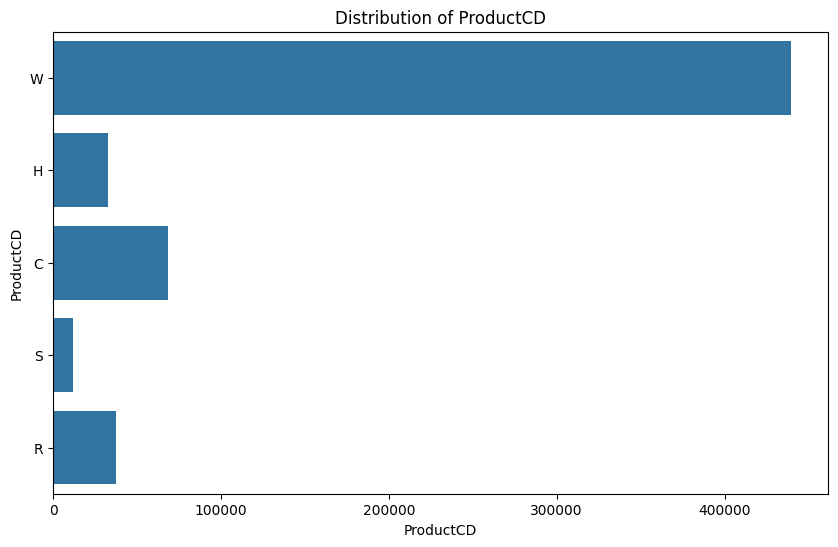

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data['ProductCD'])
plt.title('Distribution of ProductCD')
plt.xlabel('ProductCD')
plt.show()


# Data Pre-Processing

Handling missing data.

In [13]:
data2 = data.copy()

In [14]:
data2.isnull().sum()

TransactionID                        0
isFraud                              0
TransactionDT                        0
TransactionAmt                       0
ProductCD                            0
card1                                0
card2                             8933
card3                             1565
card4                             1577
card5                             4259
card6                             1571
addr1                            65706
addr2                            65706
dist1                           352271
dist2                           552913
P_emaildomain                    94456
R_emaildomain                   453249
SK_ID_CURR                      283029
NAME_CONTRACT_TYPE              283029
CODE_GENDER                     283029
FLAG_OWN_CAR                    283029
FLAG_OWN_REALTY                 283029
CNT_CHILDREN                    283029
AMT_INCOME_TOTAL                283029
AMT_CREDIT                      283029
AMT_ANNUITY              

Imputation for numerical data. Mean imputation technique has been used for numerical data. This method was chosen because it reduces the impact of missing data on the dataset's distribution and preserves the overall statistical characteristics of the data. Although, being mindful that bias can be introduced if the dataset has outliers and is not normally distributed.

In [15]:
numerical_features = [
    "TransactionAmt", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
    "AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "HOUR_APPR_PROCESS_START",
    "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "LANDAREA_AVG", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_3",
    "YEARS_BUILD_MEDI", "ENTRANCES_AVG", "BASEMENTAREA_MEDI", "COMMONAREA_MEDI", "LANDAREA_MODE", "BASEMENTAREA_MODE", "APARTMENTS_AVG", "FLAG_DOCUMENT_18",
     "FLOORSMAX_AVG", "LIVINGAPARTMENTS_AVG", "NONLIVINGAPARTMENTS_AVG", "ENTRANCES_MEDI", "FLOORSMIN_MEDI","EXT_SOURCE_1", "REGION_RATING_CLIENT_W_CITY"

]

for feature in numerical_features:
    data2[feature].fillna(data2[feature].mean(), inplace=True)

Imputation for categorical data. Mode imputation technique has been used for categorical data. This is because they contain high missingness. Mode imputation was chosen because it reserves the original data distribution for the imputed variables, which we want for model accuracy. Additionally, as some of the data is not in numerical format, mode is a more suitable option. Although, to bare in mind that if a variable's mode is not the most common value, imputation may not reflect the true underlying patterns and relationships between variables may be ignored.

In [16]:
categorical_features = [
    "ProductCD", "card4", "card6", "NAME_CONTRACT_TYPE", "CODE_GENDER", "OCCUPATION_TYPE", "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START",
    "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_WORK_CITY"
]

for feature in categorical_features:
    data2[feature].fillna(data2[feature].mode()[0], inplace=True)

Imputation for mixed categorical and numeric data.

In [17]:
mixed_features = {
    "card2": "numerical", "card3": "numerical", "card5": "numerical", "addr1": "numerical",
    "addr2": "numerical", "dist1": "numerical", "dist2": "numerical",
    "P_emaildomain": "categorical", "R_emaildomain": "categorical"
}

for feature, imputation_type in mixed_features.items():
    if imputation_type == "numerical":
        data2[feature].fillna(data2[feature].mean(), inplace=True)
    elif imputation_type == "categorical":
        data2[feature].fillna(data2[feature].mode()[0], inplace=True)

Checking imputation has been applied successfully:

In [18]:
data2.isnull().sum()

TransactionID                        0
isFraud                              0
TransactionDT                        0
TransactionAmt                       0
ProductCD                            0
card1                                0
card2                                0
card3                                0
card4                                0
card5                                0
card6                                0
addr1                                0
addr2                                0
dist1                                0
dist2                                0
P_emaildomain                        0
R_emaildomain                        0
SK_ID_CURR                      283029
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY              

Saving Preprocessed data.

In [19]:
data2.to_csv('preprocessed_data.csv', index=False)

### Data Encoding

In [20]:
preprocessed_data = data2.copy()
preprocessed_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,2987000,0,86400,68.5,W,13926,362.555488,150.0,discover,142.0,credit,315.0,87.0,19.00000,231.855423,gmail.com,gmail.com,100002.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,12.061091,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.02470,0.0369,0.9722,0.6192,0.0143,0.00,0.069000,0.083300,0.1250,0.036900,0.020200,0.0190,0.000000,0.0000,0.0252,0.038300,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.037700,0.022,0.0198,0.0,0.0,0.0250,0.036900,0.9722,0.624300,0.014400,0.00,0.069000,0.0833,0.125000,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,2987001,0,86401,29.0,W,2755,404.000000,150.0,mastercard,102.0,credit,325.0,87.0,118.50218,231.855423,gmail.com,gmail.com,100003.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,12.061091,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.09590,0.0529,0.9851,0.7960,0.0605,0.08,0.034500,0.291700,0.3333,0.013000,0.077300,0.0549,0.003900,0.0098,0.0924,0.053800,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.012800,0.079,0.0554,0.0,0.0,0.0968,0.052900,0.9851,0.798700,0.060800,0.08,0.034500,0.2

In [21]:
preprocessed_data['R_emaildomain'].fillna('unknown', inplace=True)

In [22]:
preprocessed_data['P_emaildomain'].fillna('unknown', inplace=True)

In [23]:
preprocessed_data.isnull().sum()

TransactionID                        0
isFraud                              0
TransactionDT                        0
TransactionAmt                       0
ProductCD                            0
card1                                0
card2                                0
card3                                0
card4                                0
card5                                0
card6                                0
addr1                                0
addr2                                0
dist1                                0
dist2                                0
P_emaildomain                        0
R_emaildomain                        0
SK_ID_CURR                      283029
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY              

One-Hot encoding for categorical data features. This process involves converting categorical variables into binary (0/1) vectors to make them suitable for machine learning algorithms. One-hot encoding preserves categorical information, prevents ordinal assumptions and reduces bias. However, it is important to be mindful of data leakage and dimensionality increase of the dataset.

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [25]:
onehot_encoder = OneHotEncoder(sparse=False, drop="first")

In [26]:
categorical_features = [
    "ProductCD", "card4", "card6", "NAME_CONTRACT_TYPE", "CODE_GENDER", "OCCUPATION_TYPE", "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START",
    "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_WORK_CITY"
]

for feature in categorical_features:
    encoded_data = onehot_encoder.fit_transform(preprocessed_data[feature].values.reshape(-1, 1))
    feature_names = [f"{feature}_{category}" for category in onehot_encoder.get_feature_names_out([feature])]
    encoded_df = pd.DataFrame(preprocessed_data, columns=feature_names)
    data = pd.concat([preprocessed_data, encoded_df], axis=1)
    preprocessed_data.drop(columns=[feature], inplace=True)


c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse

Label encoding for mixed data features. Label encoding was chosen for numerical features as it reduces dimentionality in the dataset and preserves order for feature categories that may have an ordinal relationship.

In [27]:
label_encoder = LabelEncoder()

In [28]:
mixed_features = {
    "card2": "numerical", "card3": "numerical", "card5": "numerical", "addr1": "numerical",
    "addr2": "numerical", "dist1": "numerical", "dist2": "numerical",
    "P_emaildomain": "categorical", "R_emaildomain": "categorical"
}

for feature, encoding_type in mixed_features.items():
    if encoding_type == "label":
        preprocessed_data[feature] = label_encoder.fit_transform(preprocessed_data[feature])


Encoding email domain categories. As email domains are not in numerical format, they need to be represented as numerical data before being encoded to make them suitable for machine learning algorithms.

In [29]:
domains = {
    'R_emaildomain': ['aim.com', 'anonymous.com', 'aol.com','att.net', 'bellsouth.net', 'centurylink.net', 'cableone.net', 'cfl.rr.com', 'charter.net', 'comcast.net', 'cox.net','earthlink.net',
    'comcast.net', 'embarqmail.com', 'frontier.com','frontiernet.net', 'gmail', 'gmail.com','gmx.de', 'hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr','icloud.com',  'juno.com',
    'live.com', 'live.com.mx', 'live.fr', 'mac.com', 'mail.com', 'me.com', 'msn.com', 'netzero.com', 'netzero.net','optonline.net', 'outlook.com', 'outlook.es', 'gmx.de', 'protonmail.com', 'prodigy.net.mx',
    'ptd.net', 'q.com', 'roadrunner.com', 'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu', 'servicios-ta.com','suddenlink.net','twc.com', 'verizon.net', 'web.de', 'windstream.net',
    'yahoo.co.jp', 'yahoo.com', 'yahoo.co.uk', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es', 'yahoo.fr', 'ymail.com', 'unknown'],
    'P_emaildomain': ['aim.com', 'anonymous.com', 'aol.com','att.net', 'bellsouth.net', 'centurylink.net', 'cableone.net', 'cfl.rr.com', 'charter.net', 'comcast.net', 'cox.net','earthlink.net',
    'comcast.net', 'embarqmail.com', 'frontier.com','frontiernet.net', 'gmail', 'gmail.com','gmx.de', 'hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr','icloud.com',  'juno.com',
    'live.com', 'live.com.mx', 'live.fr', 'mac.com', 'mail.com', 'me.com', 'msn.com', 'netzero.com', 'netzero.net','optonline.net', 'outlook.com', 'outlook.es', 'gmx.de', 'protonmail.com', 'prodigy.net.mx',
    'ptd.net', 'q.com', 'roadrunner.com', 'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu', 'servicios-ta.com','suddenlink.net','twc.com', 'verizon.net', 'web.de', 'windstream.net',
    'yahoo.co.jp', 'yahoo.com', 'yahoo.co.uk', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es', 'yahoo.fr', 'ymail.com', 'unknown']
}


email_encoded = pd.DataFrame(domains)

def label_encode_domains(domains):
    encoded_domains = {}
    label_encoder = LabelEncoder()

    for column in domains.columns:
        encoded_domains[column] = label_encoder.fit_transform(domains[column])

    return encoded_domains


encoded_domains = label_encode_domains(email_encoded)

encoded_domains_df = pd.DataFrame(encoded_domains)

In [30]:
preprocessed_data = preprocessed_data.drop(['R_emaildomain', 'P_emaildomain'], axis=1)
result = pd.concat([preprocessed_data, encoded_domains_df], axis=1)
newencoded_data = result.copy()

In [31]:
newencoded_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,R_emaildomain,P_emaildomain
0,2987000,0,86400,68.5,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,100002.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,12.061091,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.02470,0.0369,0.9722,0.6192,0.0143,0.00,0.069000,0.083300,0.1250,0.036900,0.020200,0.0190,0.000000,0.0000,0.0252,0.038300,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.037700,0.022,0.0198,0.0,0.0,0.0250,0.036900,0.9722,0.624300,0.014400,0.00,0.069000,0.0833,0.125000,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
1,2987001,0,86401,29.0,2755,404.000000,150.0,102.0,325.0,87.0,118.50218,231.855423,100003.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,12.061091,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.09590,0.0529,0.9851,0.7960,0.0605,0.08,0.034500,0.291700,0.3333,0.013000,0.077300,0.0549,0.003900,0.0098,0.0924,0.053800,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.012800,0.079,0.0554,0.0,0.0,0.0968,0.052900,0.9851,0.798700,0.060800,0.08,0.034500,0.2917,0.333300,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,2987002,0,86469,59.0,4663,490.000000,150.0,166.0,330.0,87.0,287.00000,231.855423,100004.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.000000,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.502130,0.555912,0.729567,0.11744,NaN,NaN,NaN,NaN,NaN,0.149725,0.226282,NaN,0.066333,0.100775,NaN,0.008809,NaN,NaN,0.087543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064958,NaN,NaN,NaN,NaN,NaN,0.087955,NaN,0.755746,0.044595,NaN,0.149213,NaN,0.231625,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,

In [32]:
newencoded_data['R_emaildomain'].fillna(newencoded_data['R_emaildomain'].mode()[0], inplace=True)

In [33]:
newencoded_data['P_emaildomain'].fillna(newencoded_data['R_emaildomain'].mode()[0], inplace=True)

In [34]:
newencoded_data.isnull().sum()

TransactionID                        0
isFraud                              0
TransactionDT                        0
TransactionAmt                       0
card1                                0
card2                                0
card3                                0
card5                                0
addr1                                0
addr2                                0
dist1                                0
dist2                                0
SK_ID_CURR                      283029
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
REGION_POPULATION_RELATIVE      283029
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                          0
FLAG_MOBIL                      283029
FLAG_EMP_PHONE           

### Feature Scaling

Feature scaling is a critical part of the process. Z-score normalisation is used here. With standardization, each feature is scaled to have a mean (average) of 0 and a standard deviation of 1. This ensures that the features have similar scales and are centered around zero to help algorithms that rely on distance or gradient-based optimization to perform well e.g Linear Regression later used. Scaling ensures that all features contribute equally to the learning process. Without scaling, some features with larger numeric ranges can dominate over those with smaller ranges (especially in models that can be bias to majority features like Random Forest later used). As a result, the algorithm may focus more on the larger-ranged features, potentially ignoring valuable information from the others. Moreover, scaled features provide more interpretable model coefficients or feature importances which is important to allow for critical model interpretability.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
newencoded_data[numerical_features] = scaler.fit_transform(newencoded_data[numerical_features])

In [37]:
newencoded_data.to_csv('encoded_data.csv', index=False)

Selecting necessary columns (from intuition) dropping unnecessary columns e.g. ID columns.

In [38]:
feature_selection = newencoded_data.copy()

In [39]:
feature_selection.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,R_emaildomain,P_emaildomain
0,2987000,0,86400,-0.278167,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,100002.0,-0.80034,0.196960,-0.662535,-0.230246,-0.703235,0.018801,2.088204,-0.632214,0.526371,0.802580,7.067717e-16,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,-0.086886,-0.875565,0.0,0.0,0.0,0.0,-4.166373e+00,0.262949,0.139376,-1.691889e+00,0.0369,0.9722,0.6192,0.0143,0.00,-1.586806e+00,-1.932703e+00,0.1250,-7.882744e-01,-2.144094e+00,0.0190,-4.625662e-01,0.0000,0.0252,-1.256717e+00,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,-7.249506e-01,0.022,0.0198,0.0,0.0,0.0250,-1.336697,0.9722,-2.808231e+00,-1.001182e+00,0.00,-1.571728e+00,0.0833,-1.609232e+00,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,0.334018,5.769209,0.346880,7.279513,-0.286844,0.0,0.885604,0.0,0.0,0.0,0.0,0.0,-0.086664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.12546,0.0,0.0,0.0,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-7.173705e-01,0.0,0.0
1,2987001,0,86401,-0.443327,2755,404.000000,150.0,102.0,325.0,87.0,118.50218,231.855423,100003.0,-0.80034,0.591440,2.391094,0.821320,2.218215,0.003541,-0.231178,-0.637619,1.494837,2.481731,7.067717e-16,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,-2.843362,-0.451238,0.0,0.0,0.0,0.0,-1.897442e+00,0.622246,NaN,-3.929690e-01,0.0529,0.9851,0.7960,0.0605,0.08,-2.264973e+00,8.842638e-01,0.3333,-1.428360e+00,-6.246634e-01,0.0549,-2.577671e-01,0.0098,0.0924,-8.611472e-01,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,-1.387196e+00,0.079,0.0554,0.0,0.0,0.0968,-0.917792,0.9851,9.176677e-01,5.373074e-01,0.08,-2.247737e+00,0.2917,1.534527e+00,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,-0.244114,-0.445671,-0.236398,-0.383330,0.226032,0.0,0.885604,0.0,0.0,0.0,0.0,0.0,-0.086664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.12546,0.0,0.0,0.0,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00,1.0,1.0
2,2987002,0,86469,-0.317889,4663,490.000000,150.0,166.0,330.0,87.0,287.00000,231.855423,100004.0,-0.80034,-0.592000,-1.597649,-1.946572,-1.513811,0.010032,-0.955508,-0.628173,0.285631,0.425253,2.

In [40]:
feature_selection = newencoded_data[['isFraud','TransactionAmt', 'addr1','addr2', 'card1','card2', 'card3','card5', 'P_emaildomain', 'R_emaildomain' , 'dist1' , 'dist2', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [41]:
feature_selection.head()

,isFraud,TransactionAmt,addr1,addr2,card1,card2,card3,card5,P_emaildomain,R_emaildomain,dist1,dist2,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,-0.278167,315.0,87.0,13926,362.555488,150.0,142.0,0.0,0.0,19.00000,231.855423,-0.80034,0.196960,-0.662535,-0.230246,-0.703235,0.018801,2.088204,-0.632214,0.526371,0.802580,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-0.875565,0.0,0.0,0.0,0.0,0.262949,0.334018,5.769209,0.346880,7.279513,-0.286844,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-7.173705e-01
1,0,-0.443327,325.0,87.0,2755,404.000000,150.0,102.0,1.0,1.0,118.50218,231.855423,-0.80034,0.591440,2.391094,0.821320,2.218215,0.003541,-0.231178,-0.637619,1.494837,2.481731,1.0,1.0,0.0,2.0,-2.843362,-2.843362,-0.451238,0.0,0.0,0.0,0.0,0.622246,-0.244114,-0.445671,-0.236398,-0.383330,0.226032,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00
2,0,-0.317889,330.0,87.0,4663,490.000000,150.0,166.0,2.0,2.0,287.00000,231.855423,-0.80034,-0.592000,-1.597649,-1.946572,-1.513811,0.010032,-0.955508,-0.628173,0.285631,0.425253,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-1.299893,0.0,0.0,0.0,0.0,0.555912,-0.822246,-0.445671,-0.819677,-0.383330,0.247821,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00
3,0,-0.355521,476.0,87.0,18132,567.000000,150.0,117.0,3.0,3.0,118.50218,231.855423,-0.80034,-0.197520,-0.985885,0.246487,-0.905879,0.008019,-0.942488,-0.655775,-1.906596,0.511551,1.0,1.0,0.0,2.0,-0.086886,-0.086886,2.094727,0.0,0.0,0.0,0.0,0.650442,0.334018,-0.445671,0.346880,-0.383330,0.579682,-6.165281e-17,-2.333720e-17,-2.020485e-16,-3.611892e-16,-5.208234e-16,-1.592928e-15
4,0,-0.355521,420.0,87.0,4497,514.000000,150.0,102.0,4.0,4.0,118.50218,231.855423,-0.80034,-0.276416,-0.296189,-0.501313,-0.095303,0.028663,-1.236857,-0.655766,0.265569,-0.425799,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-0.451238,0.0,0.0,0.0,1.0,0.322738,-0.822246,-0.445671,-0.819677,-0.383330,-0.239914,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00


In [42]:
feature_selection.isnull().sum()

isFraud                             0
TransactionAmt                      0
addr1                               0
addr2                               0
card1                               0
card2                               0
card3                               0
card5                               0
P_emaildomain                       0
R_emaildomain                       0
dist1                               0
dist2                               0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
REGION_POPULATION_RELATIVE     283029
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                     283029
FLAG_CONT_MOBILE               283029
FLAG_EMAIL                     283029
CNT_FAM_MEMBERS                283031
REGION_RATIN

#### Correlation Analysis

Investigating correlation between columns

visualising relationships between multiple numerical features. This helps identify potential correlations or patterns.

In [43]:
correlation_matrix = feature_selection.corr()
target_correlations = correlation_matrix['isFraud'].abs().sort_values(ascending=False)


Investigating feature importance and if there are features that influence heavily whether a specific transaction is fraudulant. From here, more features can be eliminated if need be.

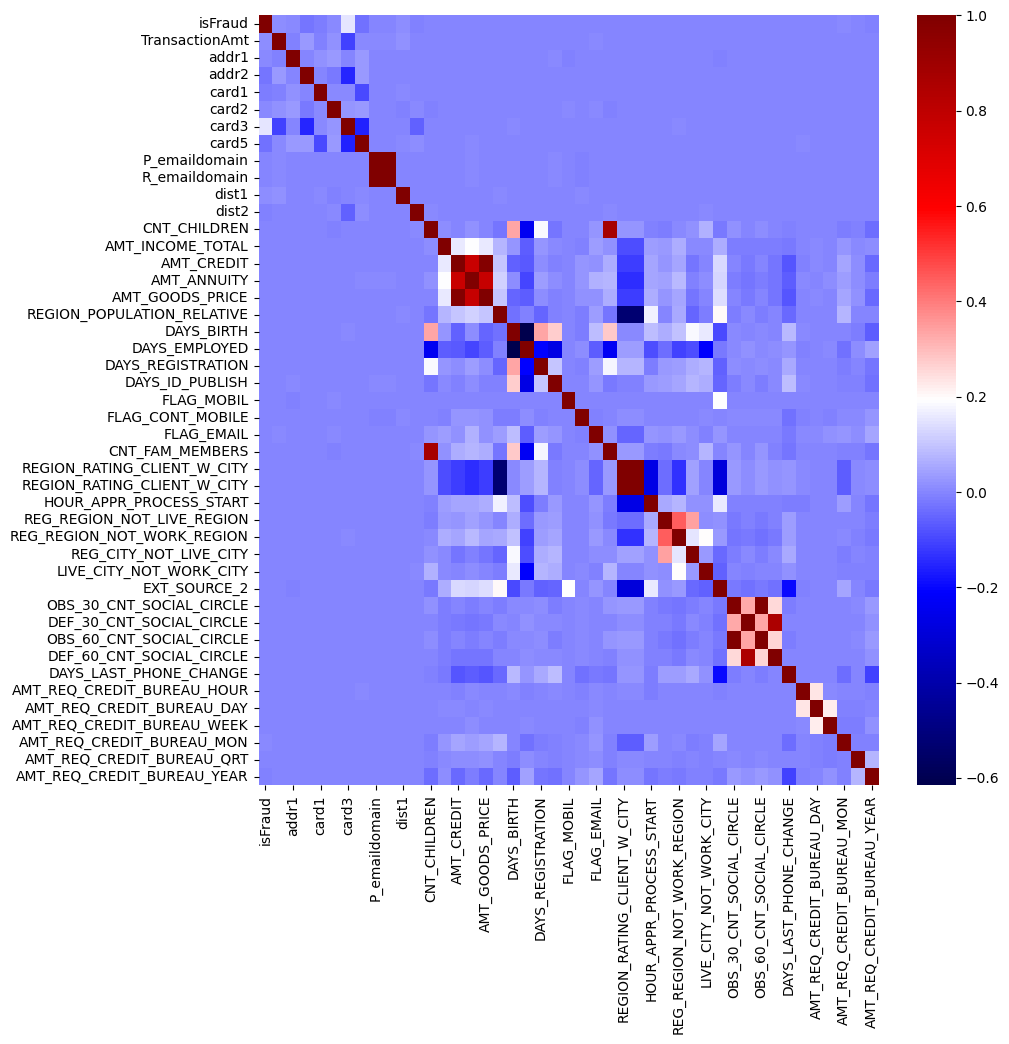

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(data=feature_selection.corr(), cmap="seismic")
plt.show();

Some relationships can be seen from the matrix. Unfortunately, a sufficient correlation matrix is not obtained. This could be due to linear relationships lost during imputation. With more time constraints, non-linear correlation or mutual information methods could be used instead. 

### Feature Engineering

To train train a machine learning decision tree model (e.g., Random Forest) feature importance scores are provided by the model to rank the features. Features with higher importance scores are considered more important.

In [45]:
feature_engineering = feature_selection.copy()
feature_engineering.head()

,isFraud,TransactionAmt,addr1,addr2,card1,card2,card3,card5,P_emaildomain,R_emaildomain,dist1,dist2,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,-0.278167,315.0,87.0,13926,362.555488,150.0,142.0,0.0,0.0,19.00000,231.855423,-0.80034,0.196960,-0.662535,-0.230246,-0.703235,0.018801,2.088204,-0.632214,0.526371,0.802580,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-0.875565,0.0,0.0,0.0,0.0,0.262949,0.334018,5.769209,0.346880,7.279513,-0.286844,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-7.173705e-01
1,0,-0.443327,325.0,87.0,2755,404.000000,150.0,102.0,1.0,1.0,118.50218,231.855423,-0.80034,0.591440,2.391094,0.821320,2.218215,0.003541,-0.231178,-0.637619,1.494837,2.481731,1.0,1.0,0.0,2.0,-2.843362,-2.843362,-0.451238,0.0,0.0,0.0,0.0,0.622246,-0.244114,-0.445671,-0.236398,-0.383330,0.226032,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00
2,0,-0.317889,330.0,87.0,4663,490.000000,150.0,166.0,2.0,2.0,287.00000,231.855423,-0.80034,-0.592000,-1.597649,-1.946572,-1.513811,0.010032,-0.955508,-0.628173,0.285631,0.425253,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-1.299893,0.0,0.0,0.0,0.0,0.555912,-0.822246,-0.445671,-0.819677,-0.383330,0.247821,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00
3,0,-0.355521,476.0,87.0,18132,567.000000,150.0,117.0,3.0,3.0,118.50218,231.855423,-0.80034,-0.197520,-0.985885,0.246487,-0.905879,0.008019,-0.942488,-0.655775,-1.906596,0.511551,1.0,1.0,0.0,2.0,-0.086886,-0.086886,2.094727,0.0,0.0,0.0,0.0,0.650442,0.334018,-0.445671,0.346880,-0.383330,0.579682,-6.165281e-17,-2.333720e-17,-2.020485e-16,-3.611892e-16,-5.208234e-16,-1.592928e-15
4,0,-0.355521,420.0,87.0,4497,514.000000,150.0,102.0,4.0,4.0,118.50218,231.855423,-0.80034,-0.276416,-0.296189,-0.501313,-0.095303,0.028663,-1.236857,-0.655766,0.265569,-0.425799,1.0,1.0,0.0,1.0,-0.086886,-0.086886,-0.451238,0.0,0.0,0.0,1.0,0.322738,-0.822246,-0.445671,-0.819677,-0.383330,-0.239914,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00


In [46]:
feature_engineering.describe()

,isFraud,TransactionAmt,addr1,addr2,card1,card2,card3,card5,P_emaildomain,R_emaildomain,dist1,dist2,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,307511.000000,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,307511.000000,307511.000000,307511.000000,307509.000000,5.905400e+05,5.905400e+05,5.905400e+05,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05,5.905400e+05
mean,0.034990,5.914973e-17,290.733794,86.800630,9898.734658,362.555488,153.194925,199.278897,9.002183,9.002183,118.502180,231.855423,1.161046e-15,1.349516e-15,-8.310684e-16,-2.405525e-15,-8.519125e-16,0.020868,-1.130877e-15,-6.801328e-16,-2.489620e-15,4.660884e-16,0.999997,0.998133,0.056720,2.152665,-5.808843e-15,-5.808843e-15,4.462873e-15,0.015144,0.050769,0.078173,0.179555,5.143927e-01,6.535947e-16,-2.569062e-16,5.446881e-16,3.407235e-16,1.993776e-16,-5.677895e-17,-3.293367e-17,-2.343613e-16,-3.495173e-16,-4.944695e-16,-1.598718e-15
std,0.183755,1.000001e+00,95.914128,2.536525,4901.170153,156.595240,11.321413,41.095455,0.278709,0.278709,236.212066,133.542444,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.013831,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.001803,0.043164,0.231307,0.910682,1.000001e+00,1.000001e+00,1.000001e+00,0.122126,0.219526,0.268444,0.383817,1.910602e-01,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-5.635343e-01,100.000000,10.000000,1000.000000,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,-8.003405e-01,-8.365774e-01,-1.907521e+00,-2.437504e+00,-1.868438e+00,0.000290,-2.918917e+00,-8.016655e-01,-7.743748e+00,-3.858466e+00,0.000000,0.000000,0.000000,1.000000,-2.843362e+00,-2.843362e+00,-5.118840e+00,0.000000,0.000000,0.000000,0.000000,8.170000e-08,-8.222457e-01,-4.456712e-01,-8.196770e-01,-3.833296e-01,-5.579857e+00,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00
25%,0.000000,-3.834474e-01,205.000000,87.000000,6019.000000,215.000000,150.000000,166.000000,9.000000,9.000000,13.000000,231.855423,-8.003405e-01,-1.975200e-01,-3.494868e-01,-2.724124e-01,-3.317215e-01,0.010006,-1.155238e-15,-6.387272e-01,-2.504348e-15,-3.468450e-01,1.000000,1.000000,0.000000,2.000000,-8.688638e-02,-8.688638e-02,-2.691037e-02,0.000000,0.000000,0.000000,0.000000,3.924574e-01,-8.222457e-01,-4.456712e-01,-8.196770e-01,-3.833296e-01,1.905465e-16,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.592928e-15
50%,0.000000,-2.770427e-01,290.733794,87.000000,9678.000000,361.000000,150.000000,226.000000,9.000000,9.000000,118.502180,231.855423,1.171811e-15,1.360696e-15,-8.016398e-16,-2.434901e-15,-8.737357e-16,0.018850,-1.155238e-15,-7.137030e-16,-2.504348e-15,4.174903e-16,1.000000,1.000000,0.000000,2.000000,-6.120605e-15,-6.120605e-15,4.522542e-15,0.000000,0.000000,0.000000,0.000000,5.659614e-01,6.418556e-16,-2.587464e-16,5.180556e-16,3.190299e-16,1.905

In [47]:
feature_engineering= feature_selection[['isFraud','TransactionAmt', 'addr1','addr2', 'card1','card2', 'card3','card5', 'P_emaildomain', 'R_emaildomain' , 'dist1' , 'dist2', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT']]

In [48]:
X = feature_engineering.drop('isFraud', axis=1)
y = feature_engineering['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Univariate feature selection - statistical test for features with mutual information which select features that are individually most relevant to the target variable.

In [49]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=21)
selector.fit(X_train, y_train)


SelectKBest(k=21,
            score_func=<function mutual_info_classif at 0x00000221D2719120>)

In [50]:
fit = selector.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featurescores = pd.concat([dfcolumns,dfscores], axis=1)
featurescores.columns =['Column', 'Score']
print(featurescores.nlargest(28, 'Score'))

                         Column     Score
7                 P_emaildomain  0.137940
8                 R_emaildomain  0.136769
2                         addr2  0.120073
5                         card3  0.079004
10                        dist2  0.078761
6                         card5  0.040310
3                         card1  0.027283
0                TransactionAmt  0.026965
4                         card2  0.019714
9                         dist1  0.017847
1                         addr1  0.014832
11                 CNT_CHILDREN  0.011515
28    AMT_REQ_CREDIT_BUREAU_QRT  0.010128
23     DEF_30_CNT_SOCIAL_CIRCLE  0.008596
25     DEF_60_CNT_SOCIAL_CIRCLE  0.008095
26     OBS_60_CNT_SOCIAL_CIRCLE  0.006019
24     OBS_30_CNT_SOCIAL_CIRCLE  0.005871
21  REGION_RATING_CLIENT_W_CITY  0.003581
20  REGION_RATING_CLIENT_W_CITY  0.003289
17                DAYS_EMPLOYED  0.002482
22      HOUR_APPR_PROCESS_START  0.001631
27       DAYS_LAST_PHONE_CHANGE  0.000641
15              AMT_GOODS_PRICE  0

In [51]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


# Random Tree Model

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [56]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9250628424529833
Confusion Matrix:
[[105886   8048]
 [  9034 104983]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    113934
           1       0.93      0.92      0.92    114017

    accuracy                           0.93    227951
   macro avg       0.93      0.93      0.93    227951
weighted avg       0.93      0.93      0.93    227951



Evaluating model accuracy on the fitting of the train and test sets for each tree depth.

In [57]:
values = [i for i in range(1, 21)]

In [60]:
train_scores, test_scores = list(), list()

In [61]:
for i in values:
 model = RandomForestClassifier(max_depth=i)
 
 model.fit(X_train, y_train)
 
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.652, test: 0.651
>2, train: 0.651, test: 0.650
>3, train: 0.661, test: 0.660
>4, train: 0.688, test: 0.688
>5, train: 0.699, test: 0.699
>6, train: 0.707, test: 0.706
>7, train: 0.713, test: 0.712
>8, train: 0.720, test: 0.720
>9, train: 0.730, test: 0.729
>10, train: 0.742, test: 0.741
>11, train: 0.756, test: 0.754
>12, train: 0.773, test: 0.770
>13, train: 0.782, test: 0.779
>14, train: 0.801, test: 0.796
>15, train: 0.815, test: 0.810
>16, train: 0.832, test: 0.826
>17, train: 0.848, test: 0.841
>18, train: 0.863, test: 0.855
>19, train: 0.876, test: 0.866
>20, train: 0.886, test: 0.875


A plot of train and test scores vs tree depth

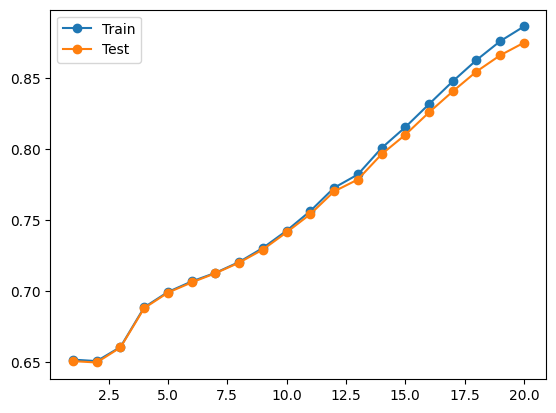

In [63]:
from matplotlib import pyplot

pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rf = RandomForestClassifier()


rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)


rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_


print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 88}


# Logistic Regression

### Over Sampling using SMOTE to rebalance imbalanced dataset.

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42) 

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### Model Evaluation

In [68]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8749424218362718
Confusion Matrix:
[[ 98699  15235]
 [ 13272 100745]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87    113934
           1       0.87      0.88      0.88    114017

    accuracy                           0.87    227951
   macro avg       0.88      0.87      0.87    227951
weighted avg       0.88      0.87      0.87    227951



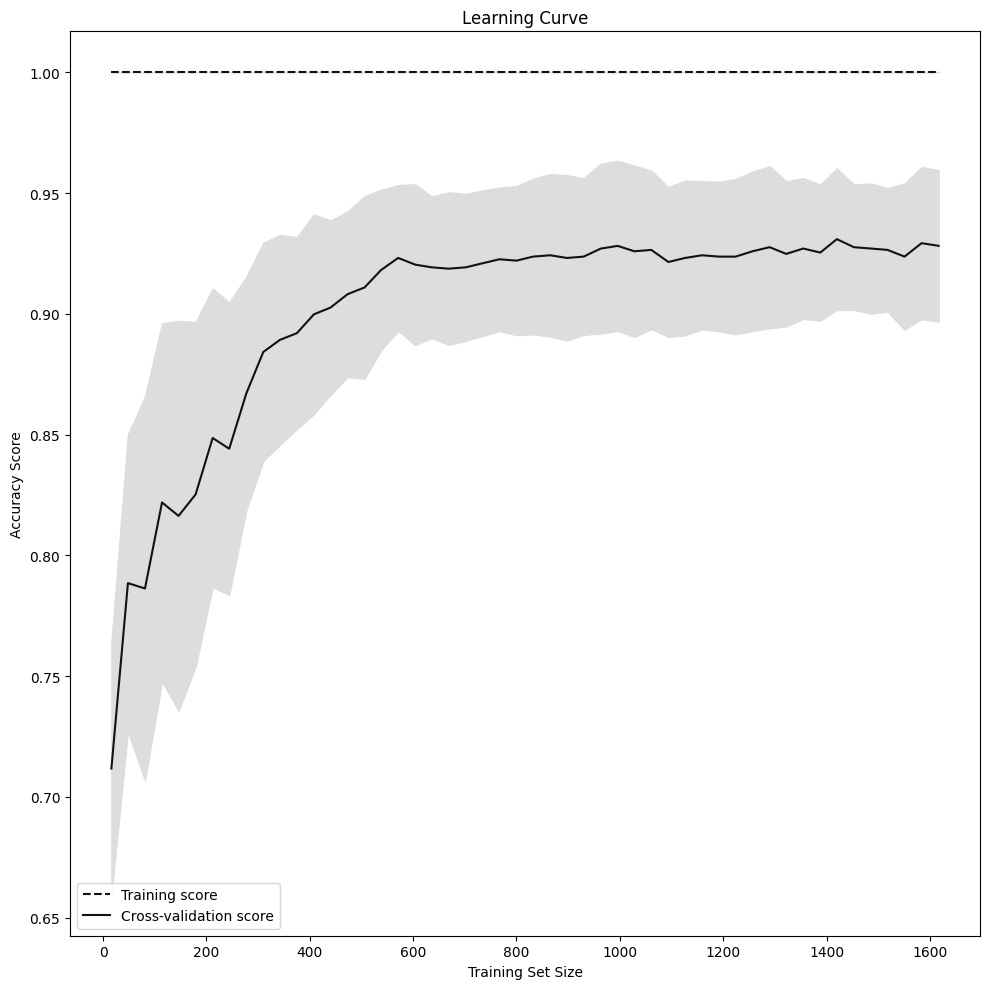

In [71]:
from sklearn.linear_model import LogisticRegression

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Further Investigation of Features

Pairwise Correlation:

This is a statistical technique used to quantify and understand the relationships between pairs of variables in a dataset.

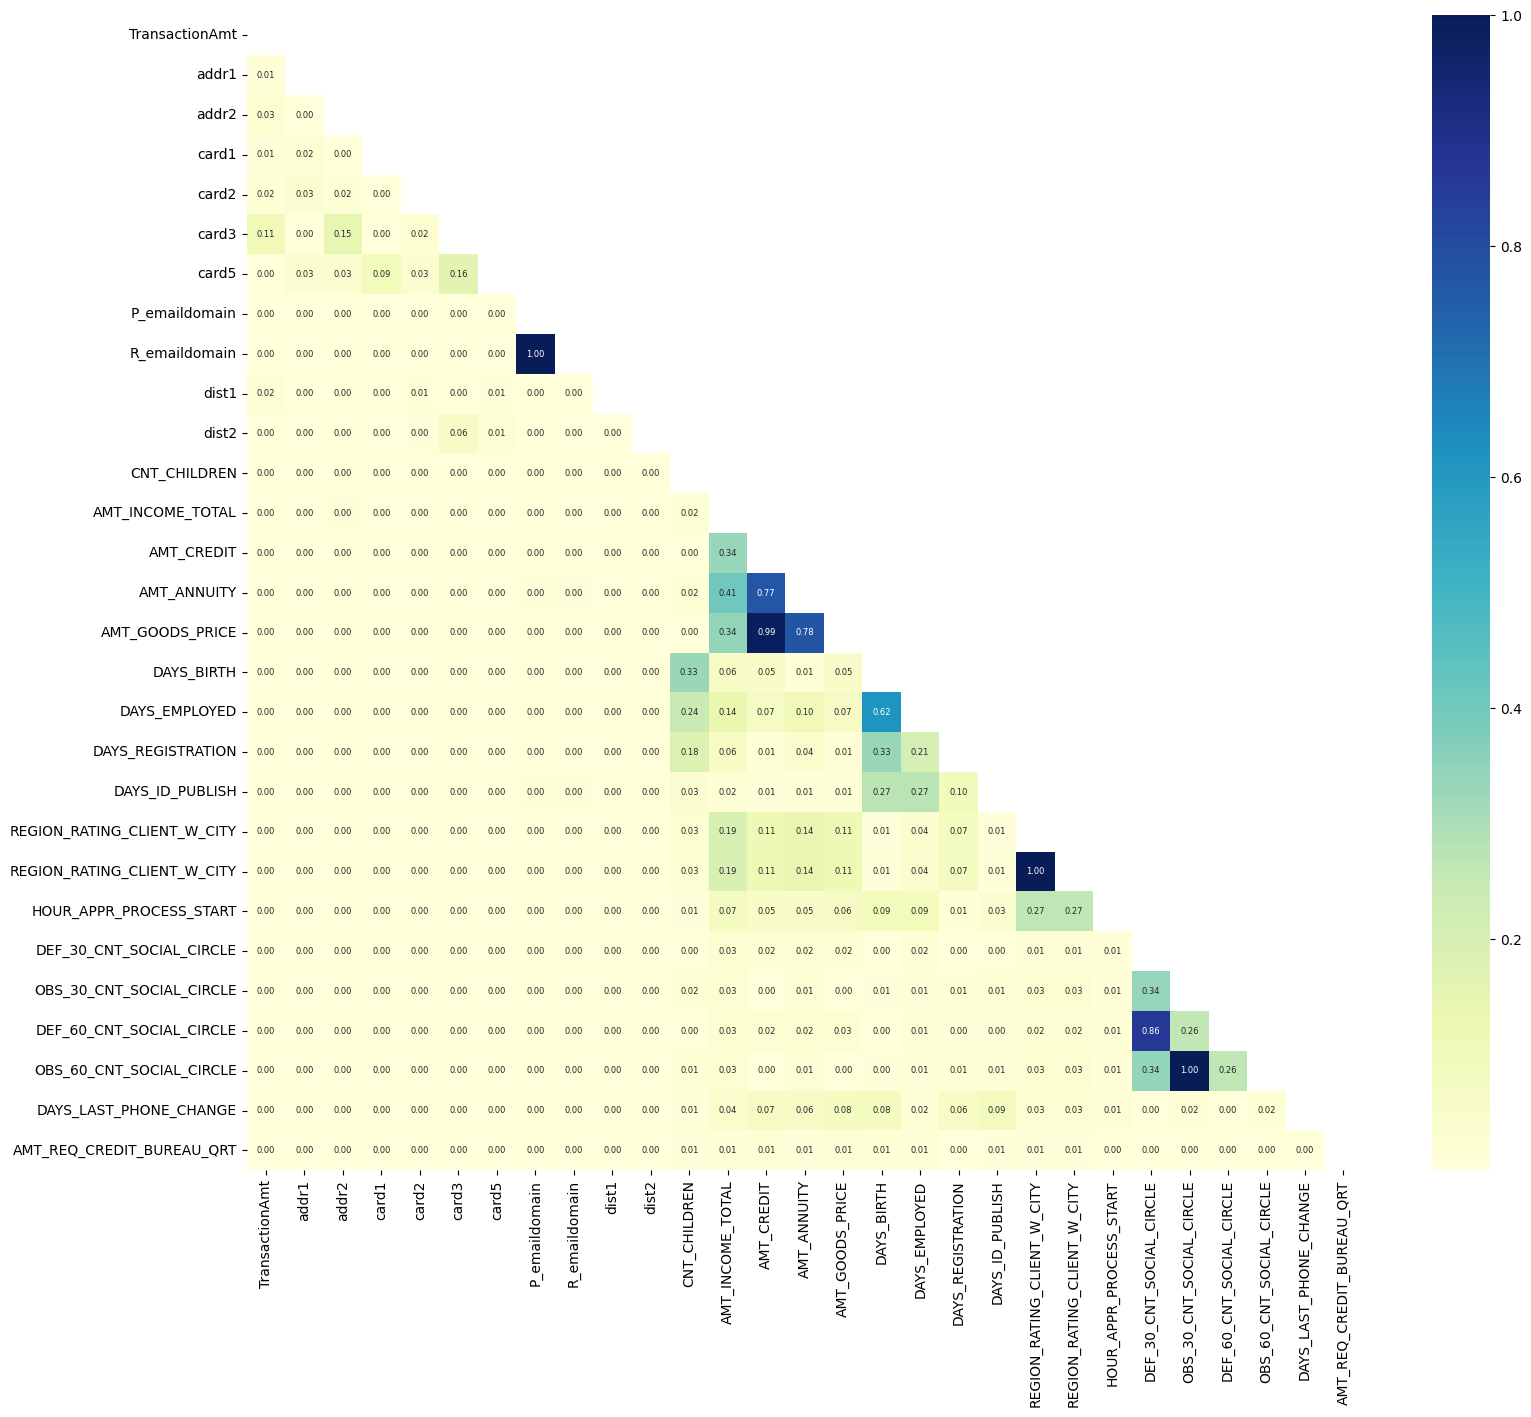

In [57]:
matrix = X_reduced.corr().abs()
mask = np.triu(np.ones_like(matrix, dtype=bool))
reduced_matrix = matrix.mask(mask)
plt.figure(figsize=(18, 15)) 
heatmap = sns.heatmap(reduced_matrix, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")
plt.show()

In [58]:
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.7)]
to_drop

['P_emaildomain',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT_W_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE']

In [59]:
X_reduced.drop(to_drop, axis=1, inplace=True)
X_reduced.shape

(413378, 22)

# Feature Importance

LOFO Importance provides a fine-grained assessment of feature importance, which can help identify the most critical features for a model. It uses a leave-one-feature-out approach. It works by iterating through the dataset and leaving out one feature at a time and measuring the impact on model's performance. However, LOFO importance may not capture interactions between features as it evaluates each feature in isolation. Furthermore, it relies on a validation set which means the quality of importance scores depends on the quality of the data split and the choice of performance metric. Running LOFO importance is an computationally expensive process.

In [60]:
from lofo import LOFOImportance, Dataset, plot_importance

c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\lofo\lofo_importance.py:3: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [61]:
importance = newencoded_data.copy()

In [62]:
X = importance.drop('isFraud', axis=1)
y = importance['isFraud']

In [63]:
importance.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,R_emaildomain,P_emaildomain
0,2987000,0,86400,-0.278167,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,100002.0,-0.80034,0.196960,-0.662535,-0.230246,-0.703235,0.018801,2.088204,-0.632214,0.526371,0.802580,7.067717e-16,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,-0.086886,-0.875565,0.0,0.0,0.0,0.0,-4.166373e+00,0.262949,0.139376,-1.691889e+00,0.0369,0.9722,0.6192,0.0143,0.00,-1.586806e+00,-1.932703e+00,0.1250,-7.882744e-01,-2.144094e+00,0.0190,-4.625662e-01,0.0000,0.0252,-1.256717e+00,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,-7.249506e-01,0.022,0.0198,0.0,0.0,0.0250,-1.336697,0.9722,-2.808231e+00,-1.001182e+00,0.00,-1.571728e+00,0.0833,-1.609232e+00,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,0.334018,5.769209,0.346880,7.279513,-0.286844,0.0,0.885604,0.0,0.0,0.0,0.0,0.0,-0.086664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.12546,0.0,0.0,0.0,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-7.173705e-01,0.0,0.0
1,2987001,0,86401,-0.443327,2755,404.000000,150.0,102.0,325.0,87.0,118.50218,231.855423,100003.0,-0.80034,0.591440,2.391094,0.821320,2.218215,0.003541,-0.231178,-0.637619,1.494837,2.481731,7.067717e-16,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,-2.843362,-0.451238,0.0,0.0,0.0,0.0,-1.897442e+00,0.622246,NaN,-3.929690e-01,0.0529,0.9851,0.7960,0.0605,0.08,-2.264973e+00,8.842638e-01,0.3333,-1.428360e+00,-6.246634e-01,0.0549,-2.577671e-01,0.0098,0.0924,-8.611472e-01,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,-1.387196e+00,0.079,0.0554,0.0,0.0,0.0968,-0.917792,0.9851,9.176677e-01,5.373074e-01,0.08,-2.247737e+00,0.2917,1.534527e+00,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,-0.244114,-0.445671,-0.236398,-0.383330,0.226032,0.0,0.885604,0.0,0.0,0.0,0.0,0.0,-0.086664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.12546,0.0,0.0,0.0,-1.137729e-01,-9.417367e-02,-2.501399e-01,-4.349590e-01,-4.981527e-01,-1.514471e+00,1.0,1.0
2,2987002,0,86469,-0.317889,4663,490.000000,150.0,166.0,330.0,87.0,287.00000,231.855423,100004.0,-0.80034,-0.592000,-1.597649,-1.946572,-1.513811,0.010032,-0.955508,-0.628173,0.285631,0.425253,2.

In [64]:
target = 'isFraud'
features = importance.drop('isFraud', axis=1)

In [65]:
from lofo import LOFOImportance, Dataset, plot_importance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

dataset = Dataset(
    df=pd.concat((X_train, y_train), axis=1), 
    target=target, 
    features=features
)

In [66]:
from sklearn.model_selection import train_test_split, KFold 

CV = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

In [67]:
Imp = LOFOImportance(
    dataset, 
    cv=CV, 
    scoring="roc_auc"
)

In [68]:
imp_result = Imp.get_importance()

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.181939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13350
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13327
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM]

  0%|          | 0/116 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.139609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13271
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13251
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  1%|          | 1/116 [00:58<1:52:41, 58.79s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  2%|▏         | 2/116 [01:51<1:44:23, 54.95s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13214
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13184
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  3%|▎         | 3/116 [02:43<1:41:34, 53.93s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.129322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13313
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13297
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  3%|▎         | 4/116 [03:31<1:36:25, 51.65s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13191
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13172
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  4%|▍         | 5/116 [04:15<1:30:24, 48.87s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13073
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  5%|▌         | 6/116 [05:02<1:28:09, 48.09s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  6%|▌         | 7/116 [05:54<1:29:52, 49.47s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13222
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13200
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  7%|▋         | 8/116 [06:57<1:36:40, 53.71s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.160947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13348
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.170097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13325
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  8%|▊         | 9/116 [08:04<1:43:07, 57.83s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  9%|▊         | 10/116 [08:59<1:40:38, 56.97s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

  9%|▉         | 11/116 [09:46<1:34:08, 53.79s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 10%|█         | 12/116 [10:33<1:30:00, 51.92s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13276
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13254
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 11%|█         | 13/116 [11:27<1:30:11, 52.54s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13339
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13316
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 12%|█▏        | 14/116 [12:20<1:29:39, 52.74s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13098
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13075
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 13%|█▎        | 15/116 [13:13<1:28:47, 52.74s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 14%|█▍        | 16/116 [14:05<1:27:43, 52.63s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 15%|█▍        | 17/116 [15:02<1:28:39, 53.73s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 16%|█▌        | 18/116 [16:01<1:30:32, 55.43s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13346
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13323
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 16%|█▋        | 19/116 [16:54<1:28:28, 54.73s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13319
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13296
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 17%|█▋        | 20/116 [18:06<1:35:49, 59.89s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 18%|█▊        | 21/116 [19:15<1:39:09, 62.63s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 19%|█▉        | 22/116 [20:08<1:33:36, 59.75s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 20%|█▉        | 23/116 [20:56<1:27:08, 56.22s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.141468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 21%|██        | 24/116 [21:54<1:26:41, 56.54s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13305
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13281
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 22%|██▏       | 25/116 [22:41<1:21:37, 53.82s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 22%|██▏       | 26/116 [23:24<1:16:01, 50.68s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 23%|██▎       | 27/116 [24:03<1:09:56, 47.15s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13073
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 24%|██▍       | 28/116 [24:40<1:04:44, 44.14s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13209
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13186
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 25%|██▌       | 29/116 [25:14<59:36, 41.11s/it]  

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13302
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 26%|██▌       | 30/116 [25:49<56:02, 39.09s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13320
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13297
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 27%|██▋       | 31/116 [26:24<53:52, 38.03s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 28%|██▊       | 32/116 [27:03<53:24, 38.15s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 28%|██▊       | 33/116 [27:38<51:41, 37.36s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.255150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13292
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13268
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035083 -> initscore=-3.3

 29%|██▉       | 34/116 [28:17<51:32, 37.72s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 30%|███       | 35/116 [28:53<50:05, 37.10s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13183
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13165
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 31%|███       | 36/116 [29:27<48:16, 36.21s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13207
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13187
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 32%|███▏      | 37/116 [30:02<47:18, 35.93s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 33%|███▎      | 38/116 [30:35<45:46, 35.21s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 34%|███▎      | 39/116 [31:10<45:07, 35.16s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13295
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13274
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 34%|███▍      | 40/116 [31:46<44:38, 35.25s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 35%|███▌      | 41/116 [32:23<44:44, 35.79s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 36%|███▌      | 42/116 [33:01<44:55, 36.43s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13073
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 37%|███▋      | 43/116 [33:39<45:05, 37.06s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 38%|███▊      | 44/116 [34:17<44:49, 37.35s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 39%|███▉      | 45/116 [34:56<44:31, 37.62s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 40%|███▉      | 46/116 [35:34<44:06, 37.81s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 41%|████      | 47/116 [36:11<43:11, 37.57s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13304
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13281
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 41%|████▏     | 48/116 [36:50<42:55, 37.88s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 42%|████▏     | 49/116 [37:27<42:14, 37.82s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13117
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 43%|████▎     | 50/116 [38:05<41:28, 37.70s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 44%|████▍     | 51/116 [38:43<40:58, 37.82s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13301
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 45%|████▍     | 52/116 [39:22<40:51, 38.31s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13194
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13167
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 46%|████▌     | 53/116 [40:01<40:17, 38.37s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13118
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 47%|████▋     | 54/116 [40:37<39:07, 37.86s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13268
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13244
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 47%|████▋     | 55/116 [41:16<38:35, 37.97s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 48%|████▊     | 56/116 [41:53<37:54, 37.92s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13338
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13314
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 49%|████▉     | 57/116 [42:31<37:08, 37.77s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 50%|█████     | 58/116 [43:09<36:38, 37.91s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 51%|█████     | 59/116 [43:46<35:49, 37.72s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13346
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13323
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 52%|█████▏    | 60/116 [44:26<35:52, 38.43s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13222
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13202
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 53%|█████▎    | 61/116 [45:05<35:09, 38.36s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13350
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13327
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM]

 53%|█████▎    | 62/116 [45:43<34:24, 38.23s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 54%|█████▍    | 63/116 [46:23<34:27, 39.01s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 55%|█████▌    | 64/116 [47:07<35:05, 40.49s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 56%|█████▌    | 65/116 [47:50<35:02, 41.23s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 57%|█████▋    | 66/116 [48:33<34:36, 41.54s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13344
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13320
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 58%|█████▊    | 67/116 [49:14<33:52, 41.48s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 59%|█████▊    | 68/116 [49:56<33:19, 41.65s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13346
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13323
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 59%|█████▉    | 69/116 [50:37<32:34, 41.58s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 60%|██████    | 70/116 [51:16<31:16, 40.79s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 61%|██████    | 71/116 [51:57<30:29, 40.65s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13074
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 62%|██████▏   | 72/116 [52:35<29:18, 39.97s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 63%|██████▎   | 73/116 [53:15<28:41, 40.03s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13301
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 64%|██████▍   | 74/116 [53:57<28:25, 40.61s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13342
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13318
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 65%|██████▍   | 75/116 [54:37<27:29, 40.24s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13341
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13318
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 66%|██████▌   | 76/116 [55:19<27:14, 40.87s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13329
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13305
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 66%|██████▋   | 77/116 [55:58<26:08, 40.21s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 67%|██████▋   | 78/116 [56:38<25:26, 40.17s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13323
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13301
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 68%|██████▊   | 79/116 [57:19<24:54, 40.39s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13340
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13318
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 69%|██████▉   | 80/116 [57:58<24:07, 40.22s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 70%|██████▉   | 81/116 [58:38<23:22, 40.08s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 71%|███████   | 82/116 [59:16<22:24, 39.55s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13098
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13074
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 72%|███████▏  | 83/116 [59:55<21:32, 39.15s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13193
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13168
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 72%|███████▏  | 84/116 [1:00:33<20:48, 39.03s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 73%|███████▎  | 85/116 [1:01:10<19:51, 38.44s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 74%|███████▍  | 86/116 [1:01:48<19:05, 38.17s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 75%|███████▌  | 87/116 [1:02:25<18:13, 37.70s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 76%|███████▌  | 88/116 [1:03:04<17:48, 38.17s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 77%|███████▋  | 89/116 [1:03:41<16:59, 37.78s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13103
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13081
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 78%|███████▊  | 90/116 [1:04:19<16:23, 37.81s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.238572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035083 -> initscore=-3.3

 78%|███████▊  | 91/116 [1:04:59<16:05, 38.63s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13341
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13318
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 79%|███████▉  | 92/116 [1:05:36<15:14, 38.11s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13096
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13073
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 80%|████████  | 93/116 [1:06:14<14:38, 38.19s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13249
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13221
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 81%|████████  | 94/116 [1:06:51<13:50, 37.76s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 82%|████████▏ | 95/116 [1:07:31<13:25, 38.35s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13268
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13245
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 83%|████████▎ | 96/116 [1:08:09<12:45, 38.29s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13339
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13315
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 84%|████████▎ | 97/116 [1:08:46<12:00, 37.91s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13331
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13306
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 84%|████████▍ | 98/116 [1:09:24<11:22, 37.90s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 85%|████████▌ | 99/116 [1:10:01<10:40, 37.68s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 86%|████████▌ | 100/116 [1:10:39<10:02, 37.67s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13173
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13161
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 87%|████████▋ | 101/116 [1:11:17<09:25, 37.68s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 88%|████████▊ | 102/116 [1:11:54<08:48, 37.72s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13345
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13322
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 89%|████████▉ | 103/116 [1:12:32<08:08, 37.56s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 90%|████████▉ | 104/116 [1:13:09<07:30, 37.52s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13345
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13322
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 91%|█████████ | 105/116 [1:13:46<06:52, 37.46s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13304
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13282
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 91%|█████████▏| 106/116 [1:14:24<06:16, 37.65s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.116064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 92%|█████████▏| 107/116 [1:15:03<05:40, 37.82s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13350
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13327
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 114
[LightGBM]

 93%|█████████▎| 108/116 [1:15:39<04:59, 37.44s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13307
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13285
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 94%|█████████▍| 109/116 [1:16:17<04:23, 37.65s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 95%|█████████▍| 110/116 [1:16:58<03:50, 38.46s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13195
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13175
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 96%|█████████▌| 111/116 [1:17:35<03:10, 38.02s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 97%|█████████▋| 112/116 [1:18:14<02:33, 38.33s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13320
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13297
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 97%|█████████▋| 113/116 [1:18:51<01:53, 37.98s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13095
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13072
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 98%|█████████▊| 114/116 [1:19:28<01:15, 37.86s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13200
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13177
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

 99%|█████████▉| 115/116 [1:20:05<00:37, 37.52s/it]

[LightGBM] [Info] Number of positive: 11487, number of negative: 319215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13347
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034735 -> initscore=-3.324649
[LightGBM] [Info] Start training from score -3.324649
[LightGBM] [Info] Number of positive: 11602, number of negative: 319100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13324
[LightGBM] [Info] Number of data points in the train set: 330702, number of used features: 113
[LightGBM]

100%|██████████| 116/116 [1:20:43<00:00, 41.75s/it]


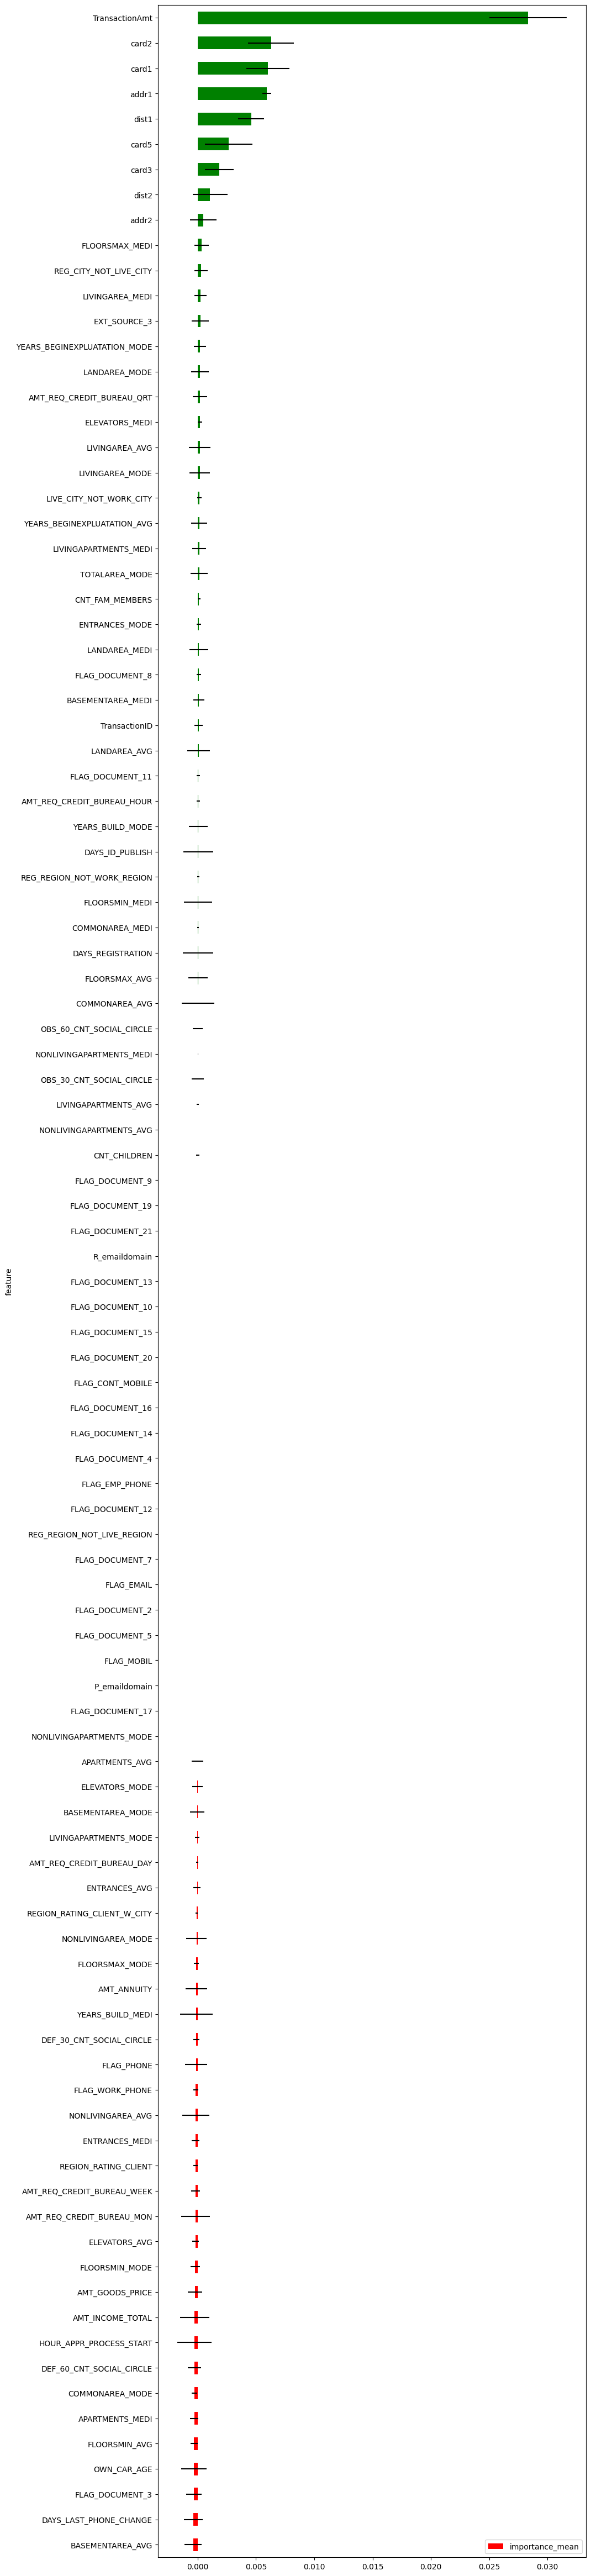

In [70]:
plot_importance(
    imp_result.head(101), 
    figsize=(10, 60), 
    kind="default"
)

We can see by the Lofo Importance output visualisation the features that hold high importance are in green, with the highest importance means. And the features that hold low importance, or would negatively impact the model, are the ones in red with lower importance means. 